### MNIST : 미국 표준기술 연구소에서 공개한 필기체 숫자에 대한 데이터베이스
-> Keras 내에 있음 

- 필요한 모듈 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist

Using TensorFlow backend.


### mnist의 데이터를 읽고 필기체의 숫자를 인식하는 프로그램 만들기!

- 이미지에 대한 지식이 없어도  
- CNN, 딥러닝의 지식이 있으면 tensorflow를 이용하여 만들 수 있음!    
----

1) 데이터를 불러와서 어떤 구조인지 확인  

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train, '\n','--'*2,'\n' ,y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] 
 ---- 
 [5 0 4 ... 5 6 8]


X_train은 3차원, y_train은 1차원의 array구조임을 확인할 수 있습니다.   
이때 첫번째 numpy행렬을 확인해보면 다음과 같이 확인할 수 있는데,    
X는 이미지 데이터, y는 그 이미지의 숫자 를 나타내는 것임을 알 수 있습니다.

In [3]:
print(X_train[0])  # 이미지데이터
print(y_train[0])  # 이미지의 숫자

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
print('X_train shape = ',X_train.shape)
print('y_train shape = ',y_train.shape)

X_train shape =  (60000, 28, 28)
y_train shape =  (60000,)


X_train은 28x28사이즈의 6만개의 이미지가 있습니다.  
y_train은 X데이터의 이미지 숫자(0~9) 6만개가 있습니다.

----

그럼 이제 test 데이터를 확인해 보겠습니다.

In [5]:
print('X_test shape = ',X_test.shape)
print('y_test shape = ',y_test.shape)

X_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


X_test는 28x28사이즈의 만 개의 이미지가 있습니다.  
y_test는 X데이터의 이미지 숫자(0~9) 만 개가 있습니다.

----

이제 X_train의 데이터를 이미지로 표현해보도록 하겠습니다.  
이미지로 표현하기 위해서는 plt를 사용합니다 ! 
컬러 이미지를 사용하려면 (cmap='gray')를 제거해주세요!


이 이미지의 값은 5 입니다.


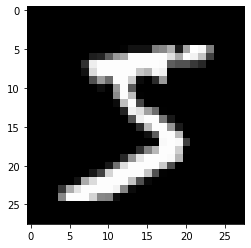

In [6]:
plt.imshow(X_train[0],cmap='gray')
print('이 이미지의 값은', y_train[0],'입니다.')

이를 통해 X의 데이터와 y의 데이터가 어떻게 되어있는지 확인하였습니다.   
이제 X의 데이터의 이미지가 실제 값인 y의 값으로 인식이 되도록 해야하는 데이터임을 알게 되었습니다.



In [7]:
def train_mnist_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    '''
    print(X_train, '\n','--'*2,'\n' ,y_train)
    print(X_train[0])  # 이미지데이터
    print(y_train[0])  # 이미지의 숫자
    print('X_train shape = ',X_train.shape)
    print('y_train shape = ',y_train.shape)
    print('X_test shape = ',X_test.shape)
    print('y_test shape = ',y_test.shape)
    plt.imshow(X_train[0],cmap='gray')
    print('이 이미지의 값은', y_train[0],'입니다.')
    '''

- 여기까지 데이터 로딩 및 이해였습니다.

---------------

#### X데이터를 3차원 데이터로 reshape
CNN의 foramt에 맞추기 위해서 3차원으로 바꿔야 합니다.  
(가로, 세로, 채널) => 3차원  
이 차원은 2차원이기 때문에 channel 1을 추가하여 3차원으로 바꾸어 줍니다..   
(RGB 데이터라면 channel이 3개이므로 28,28,3로 표현합니다.)

In [8]:
X_train = X_train.reshape(60000,28,28,1) 
X_test = X_test.reshape(10000,28,28,1)

### softmax
- Multi-Class Classification으로 output 값을 나타냅니다.  
  
- output이 0부터 9까지 숫자로 총 10개의 노드이기때문에(Multi-Class output)     
  softmax를 사용해야 합니다.
  
- 이를 위해서 y값을 one-hot encoding 표현법으로 변환 합니다.
  
###### one-hot encoding
만약   
y값이 1 : 0, 1, 0, 0, 0, 0, 0, 0, 0, 0  
y값이 6 : 0, 0, 0, 0, 0, 0, 1, 0, 0, 0  
0부터 9까지 10개의 노드에서  
각 값에 해당하는 노드는 1, 나머지는 0 할당하는 것입니다.  

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 모델링
0) Input 데이터의 차원, 사이즈  

[Hidden Layer  ]  
1) Convolutional Layer  -> Conv2D(필터의 개수, 커널사이즈, 활성함수, 이름 지정 )  
2) Pooling Layer        -> MaxPooling2D  
3) Full Conected Layer (여기서는 생략하여 차원을 축소시키는 Flatten을 사용했습니다.)     
  
4) Softmax Layer        -> Dense(outlayer 노드수,  활성함수 = 'softmax')  
  
이렇게 모델링을 진행했습니다.    
(딥러닝에서 히든레이어에 따라 복잡도가 달라지므로   
이론적, 경험적 지식을 쌓아 최선의 방법을 찾아 가야 합니다!  )    
con2D의 파라미터 개수 = n_filters * (filter_size + 1)= 32*(9+1) = 320개 

In [10]:
model = Sequential([
            Input(shape = (28,28,1), name = 'input_layer'),
            Conv2D(32,kernel_size=3, activation= 'relu', name = 'cov_layer1' ),
            #Dropout(0.5) 데이터 기반한 weight를 줄여 오버핏팅을 줄이는 것
            MaxPooling2D(pool_size= 2), 
            Flatten(), 
            Dense(10, activation= 'softmax', name = '')
            ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cov_layer1 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=10, epochs = 3)


Epoch 1/3
6000/6000 [==============================] - 14s 2ms/step - loss: 0.4147 - accuracy: 0.9441 - val_loss: 0.1002 - val_accuracy: 0.9695
Epoch 2/3
6000/6000 [==============================] - 15s 3ms/step - loss: 0.1047 - accuracy: 0.9698 - val_loss: 0.1125 - val_accuracy: 0.9709
Epoch 3/3
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0885 - accuracy: 0.9742 - val_loss: 0.1138 - val_accuracy: 0.9680


In [12]:
def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper right')
    plt.show

{'loss': [0.4146933853626251, 0.1047338917851448, 0.08850955218076706], 'accuracy': [0.9441166520118713, 0.9698333144187927, 0.9742333292961121], 'val_loss': [0.10021696984767914, 0.11250945180654526, 0.11378105729818344], 'val_accuracy': [0.9695000052452087, 0.9708999991416931, 0.9679999947547913]}
train loss = 0.08850955218076706
validation loss = 0.11378105729818344
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mnist.model\assets


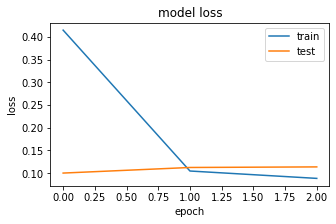

In [13]:
plot_loss_curve(history.history)
print(history.history)

print('train loss =', history.history['loss'][-1])
print('validation loss =', history.history['val_loss'][-1])

model.save('mnist.model')


----

Epoch 1/3
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0635 - accuracy: 0.9815 - val_loss: 0.1001 - val_accuracy: 0.9752
Epoch 2/3
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0487 - accuracy: 0.9857 - val_loss: 0.1217 - val_accuracy: 0.9737
Epoch 3/3
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0450 - accuracy: 0.9866 - val_loss: 0.1246 - val_accuracy: 0.9746
{'loss': [0.06348943710327148, 0.04867129772901535, 0.044967133551836014], 'accuracy': [0.9815499782562256, 0.9857000112533569, 0.9866499900817871], 'val_loss': [0.10008084028959274, 0.12174823135137558, 0.12464195489883423], 'val_accuracy': [0.9751999974250793, 0.9736999869346619, 0.9746000170707703]}
train loss = 0.044967133551836014
validation loss = 0.12464195489883423
INFO:tensorflow:Assets written to: mnist.model\assets


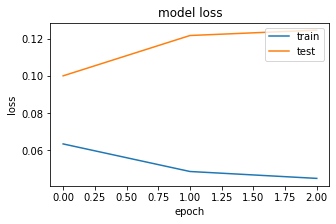

In [14]:
def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper right')
    plt.show
    
def train_mnist_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000,28,28,1) 
    X_test = X_test.reshape(10000,28,28,1)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
#     print(y_train[1563])
    
    
    model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=20, epochs = 3)
    
    plot_loss_curve(history.history)
    print(history.history)
    print('train loss =', history.history['loss'][-1])
    print('validation loss =', history.history['val_loss'][-1])

    model.save('mnist.model')
    return model

    
if __name__ == '__main__':
    train_mnist_model()

- 이렇게해서 데이터를 로딩하고, train 모델까지 완성 했습니다.

----

- 예측 하기

처음 test_id 를 0보다 작은수를 임의로 지정해서    
랜덤하게 10000개의 숫자중에서 하나의 숫자를 뽑아서   
그 숫자에 해당하는 샘플을 시험해보기 위해  test_sample_id라는 변수에 숫자를 할당합니다.  

(이때 10,000은 test의 데이터 개수입니다.)  

In [26]:
test_id = -1
if test_id <0 :
    from random import randrange
    test_sample_id = randrange(10000)
else:
    test_sample_id = test_id

그렇게 구한 랜덤 숫자에대한 X_test내의 이미지를    
test_image 변수에 할당합니다.  
   
그리고 그 test_image를 plt.imshow를 통해 표현합니다.  
그 후 test 이미지는 3차원으로 reshape합니다.   
{reshae(이미지 개수, 차원(28*28*1))}  

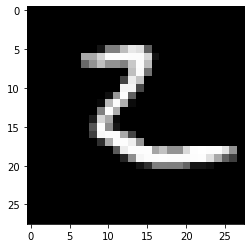

In [27]:
test_image =X_test[test_sample_id]
plt.imshow(test_image, cmap = 'gray')

test_image = test_image.reshape(1,28,28,1)

해당하는 y_test의 실제값을 y_actual 에 할당하고 출력합니다.  
  
그리고 위에서 구한 test_image를 통해 예측을 합니다.   
predict함수를 통한 예측 후 예측값을 구하고 출력합니다.  
이때 y_pred는 값이 아닌 길이 1x10의 행렬이 나옵니다.   
  -> output layer의 10개의 노드(0 부터 9)의 각 확률 입니다.    
(따라서 각 element의 값은 0부터 1사이 이고, 모든 element의 sum = 1입니다.)  

그리고 예측값 중 가장 높은 값을 출력하기 위해 numpy의 argmax함수를 통해 위에서 구한 행렬 중 가장 높은 값을 출력합니다.  
(이때 index 0을 한 이유는 argmax함수로인해 가장 높은 값이 맨앞으로 오기 때문입니다. )  
그 중 가장 높은 값을 가지는 노드가 예측값으로 출력이 됩니다.

In [28]:
y_actual = y_test[test_sample_id]
print('y_actual number = ', y_actual)

y_pred = model.predict(test_image)
print("y_pred = ", y_pred)
y_pred = np.argmax(y_pred, axis = 1)[0]
print('y_pred number = ', y_pred)


y_actual number =  2
y_pred =  [[1.2383514e-12 6.9726266e-11 9.9977881e-01 2.3531889e-05 2.8966977e-05
  9.9121883e-13 1.6882057e-04 5.2628857e-10 1.5181531e-10 3.0919115e-12]]
y_pred number =  2


---
### Combine

In [29]:
def predict_image_sample(model,X_test, y_test, test_id= -1 ):
    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(10000)
    else:
        test_sample_id = test_id
    
    test_image =X_test[test_sample_id]
    plt.imshow(test_image, cmap = 'gray')
    
    test_image = test_image.reshape(1,28,28,1)
    
    y_actual = y_test[test_sample_id]
    print('y_actual number = ', y_actual)
    
    y_pred = model.predict(test_image)
    print("y_pred = ", y_pred)
    y_pred = np.argmax(y_pred, axis = 1)[0]
    print('y_pred number = ', y_pred)
    
    
    

예측값과 실제값이 맞지 않다면,  
어떤 이미지가 맞지 않았는지 확인하기 위해 저장


    if y_pred != y_actual:
        print("sample %d is worng" %test_sample_id)
        with open('wrong_samples.txt',"a") as errfile:
            print('%d' %test_sample_id, file = errfile)
    else :
        print('sample %d is correct!' %test_sample_id)


이제 Action! 

1) tensorflow 내에 있는 mnist 데이터를 로딩하고    
  
2) model은 실행하면 위에서 epoch를 하며 학습을 하나 예측할때마다 반복하면 시간이 많이 걸리기 때문에      
   ->  위에서 실행한 학습(train) 모델을 저장해놓고, 그 학습 모델을 불러오도록 했습니다. (mnist.model)    
  
3) predicton 실행합니다.  


y_actual number =  6
y_pred =  [[4.8511938e-05 3.6553862e-09 8.6973201e-10 1.3638060e-14 2.6361283e-08
  2.9137456e-12 9.9995124e-01 1.6819934e-20 1.8915182e-07 1.1119819e-13]]
y_pred number =  6


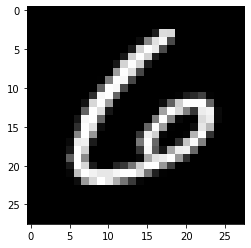

In [30]:
if __name__ == '__main__' :
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    model = load_model('mnist.model')
    predict_image_sample(model,X_test, y_test)

-----

# 최종 Code

y_actual number =  7
y_pred =  [[3.08752264e-13 6.08673773e-17 1.66631597e-08 8.67346330e-07
  3.76558423e-17 3.75729619e-14 1.08983236e-16 9.99999166e-01
  3.88672037e-12 2.64305182e-08]]
y_pred number =  [[3.08752264e-13 6.08673773e-17 1.66631597e-08 8.67346330e-07
  3.76558423e-17 3.75729619e-14 1.08983236e-16 9.99999166e-01
  3.88672037e-12 2.64305182e-08]]
y_actual number =  2
y_pred =  [[2.72756520e-17 2.89546789e-11 1.00000000e+00 2.08379668e-12
  5.17839631e-18 1.20352983e-19 5.86267406e-12 1.42946392e-23
  1.09248415e-17 1.46130583e-21]]
y_pred number =  [[2.72756520e-17 2.89546789e-11 1.00000000e+00 2.08379668e-12
  5.17839631e-18 1.20352983e-19 5.86267406e-12 1.42946392e-23
  1.09248415e-17 1.46130583e-21]]
y_actual number =  1
y_pred =  [[1.29984727e-07 9.99311209e-01 3.28255592e-05 1.09092078e-08
  1.20399985e-04 1.42628771e-08 1.00256464e-07 3.43887474e-09
  5.35096275e-04 1.00539104e-07]]
y_pred number =  [[1.29984727e-07 9.99311209e-01 3.28255592e-05 1.09092078e-08
  1.

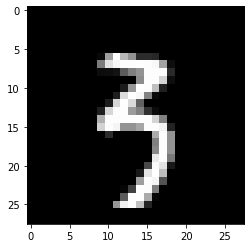

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist


def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper right')
    plt.show
    
def train_mnist_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000,28,28,1) 
    X_test = X_test.reshape(10000,28,28,1)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
#     print(y_train[1563])
    
    
    model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=20, epochs = 3)
    
    plot_loss_curve(history.history)
    print(history.history)
    print('train loss =', history.history['loss'][-1])
    print('validation loss =', history.history['val_loss'][-1])

    model.save('mnist.model')
    return model

def predict_image_sample(model,X_test, y_test, test_id= -1 ):
    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(10000)
    else:
        test_sample_id = test_id
    
    test_image =X_test[test_sample_id]
    plt.imshow(test_image, cmap = 'gray')
    
    test_image = test_image.reshape(1,28,28,1)
    
    y_actual = y_test[test_sample_id]
    print('y_actual number = ', y_actual)
    
    y_pred = model.predict(test_image)
    print("y_pred = ", y_pred)
    y_pred_num = np.argmax(y_pred, axis = 1)[0]
    print('y_pred number = ', y_pred)
    return y_actual , y_pred_num
'''    
if __name__ == '__main__' :
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    model = load_model('mnist.model')
    predict_image_sample(model,X_test, y_test)
'''    
    
if __name__ == '__main__' :
    n = 0
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    model = load_model('mnist.model')
#     predict_image_sample(model,X_test, y_test)
    
    for i in range(700):
        y_actual , y_pred_num = predict_image_sample(model,X_test, y_test,test_id = i)
        if y_actual == y_pred_num:
            n += 1 
        else : pass
print('전체 횟수 :', i,' '*10,'예측 성공 횟수',n,'\n'*2 ,'정확도 = ', (n/i)*100)